In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import joblib

In [2]:
data=pd.read_csv("D:\FCI\Machine Learning\Wine Quality\winequality-red.csv")

# Displaying Data

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
data.shape

(1599, 12)

In [8]:
print(f"Number of rows {data.shape[0]}")
print(f"Number of columns {data.shape[1]}")

Number of rows 1599
Number of columns 12


### Datatypes

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
data.isnull() #output is pandas dataframe with boolean values telling us whether the value in a specific row or column is null

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
data.describe() #print statistical measures of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Bivariant Analysis
Taking two variables at a time and performing analysis

In [13]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### Fixed Acidity vs Quality

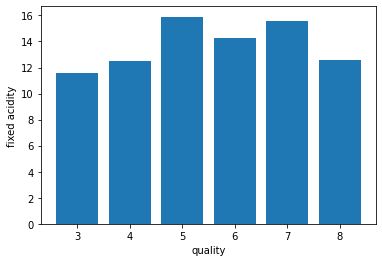

In [14]:
plt.bar(data['quality'], data['fixed acidity']) # print bar chart (column_on_Xaxis, column_on_Yaxis)
plt.xlabel("quality")
plt.ylabel("fixed acidity")
plt.show() # This line is written to remove the first printed line and display the plot only

#### Volatile Acidity vs Quality

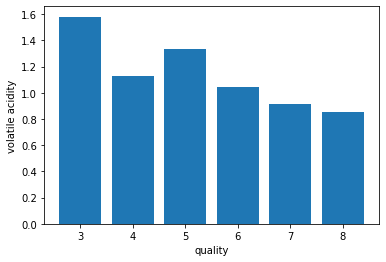

In [15]:
plt.bar(data['quality'], data['volatile acidity'])
plt.xlabel("quality")
plt.ylabel("volatile acidity")
plt.show()

#### Citric Acid vs Quality

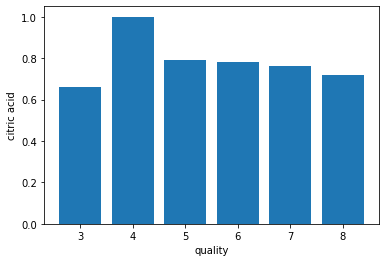

In [16]:
plt.bar(data['quality'], data['citric acid'])
plt.xlabel("quality")
plt.ylabel("citric acid")
plt.show()

#### Residual Sugar vs Quality

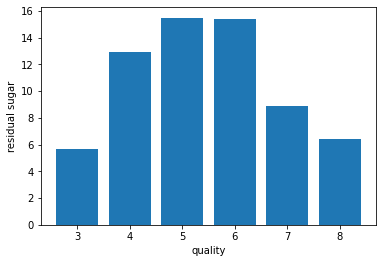

In [17]:
plt.bar(data['quality'], data['residual sugar'])
plt.xlabel("quality")
plt.ylabel("residual sugar")
plt.show()

#### Chlorides vs Quality

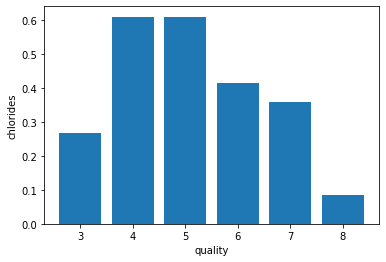

In [18]:
plt.bar(data['quality'], data['chlorides'])
plt.xlabel("quality")
plt.ylabel("chlorides")
plt.show()

#### Free Sulphurdioxide vs Quality

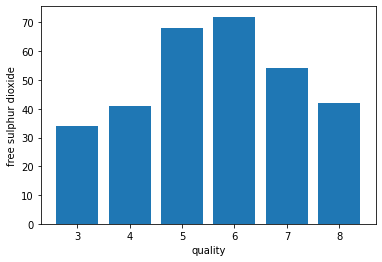

In [19]:
plt.bar(data['quality'], data['free sulfur dioxide'])
plt.xlabel("quality")
plt.ylabel("free sulphur dioxide")
plt.show()

#### Total Sulfurdioxide vs Quality

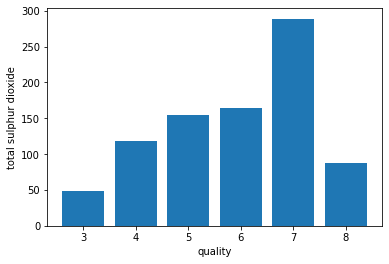

In [20]:
plt.bar(data['quality'], data['total sulfur dioxide'])
plt.xlabel("quality")
plt.ylabel("total sulphur dioxide")
plt.show()

In [21]:
np.var(data['total sulfur dioxide'])

1081.42563558916

#### Density vs Quality

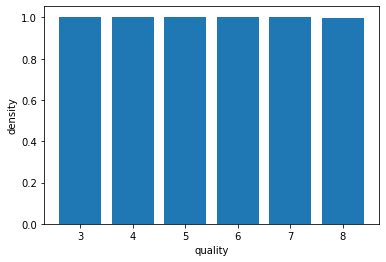

In [22]:
plt.bar(data['quality'], data['density'])
plt.xlabel("quality")
plt.ylabel("density")
plt.show()

In [23]:
np.var(data['density'])

3.5598017926307083e-06

#### pH vs Quality

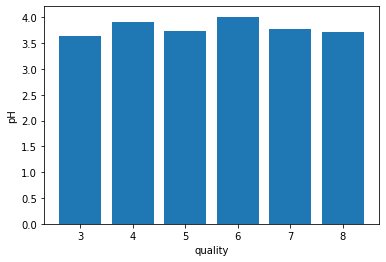

In [24]:
plt.bar(data['quality'], data['pH'])
plt.xlabel("quality")
plt.ylabel("pH")
plt.show()

#### Sulphates vs Quality

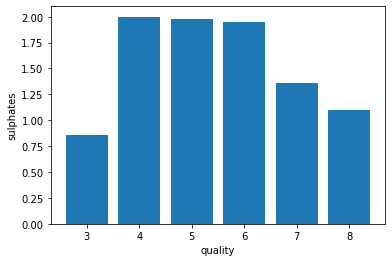

In [25]:
plt.bar(data['quality'], data['sulphates'])
plt.xlabel("quality")
plt.ylabel("sulphates")
plt.show()

#### Alcohol vs Quality

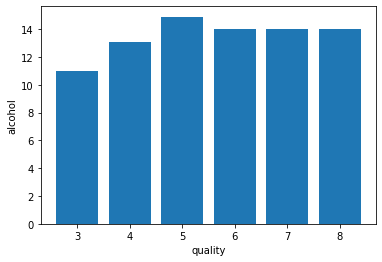

In [26]:
plt.bar(data['quality'], data['alcohol'])
plt.xlabel("quality")
plt.ylabel("alcohol")
plt.show()

### Correlation Matrix

<AxesSubplot:>

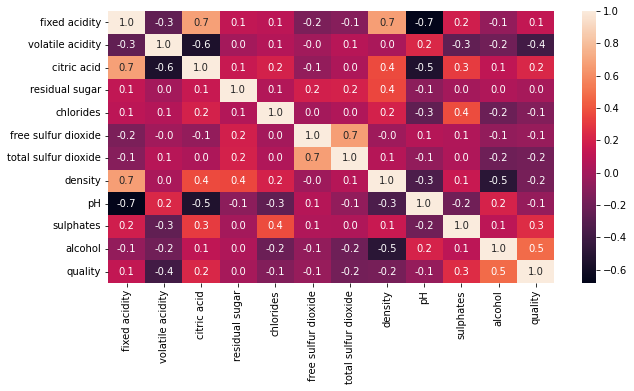

In [27]:
plt.figure(figsize=(10,5)) # maximizing figure size, default figsize=(6.4, 4.8)
sns.heatmap(data.corr(), annot=True, fmt='0.1f')  # heatmap(data, write_values_for_data_or_not, decimal_precision)

In [28]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [29]:
type(data.corr())

pandas.core.frame.DataFrame

## Binarization of Target Variable

In [30]:
data['quality'].unique() #Display the unique values in the column

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [31]:
data.loc[data['quality']==6].count()[0]

638

In [32]:
data.loc[data['quality']==7].count()[0]

199

In [33]:
data.loc[data['quality']==8].count()[0]

18

In [34]:
638+199+18

855

In [35]:
1599-855

744

We are going to put 1 (good quality) if the target value is greater than or equal 7 else we will put 0 (not good quality)

In [36]:
data['quality']=[1 if y>=7 else 0 for y in data['quality']]

In [37]:
data['quality'].unique()

array([0, 1], dtype=int64)

In [38]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [39]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,0


Now we notice that quality only contains values [0, 1]

### Checking for Imbalanced Data

In [40]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

list of existing figure numbers [1]


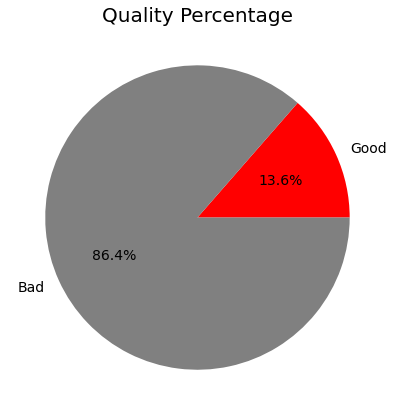

In [41]:
good = data.loc[data['quality']==1].count()[0]
bad = data.loc[data['quality']==0].count()[0]

labels = ['Good','Bad']
colors = ['red','grey']

plt.title('Quality Percentage',fontdict={'fontsize':20})

plt.pie([good,bad], labels=labels, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 14})

print(f"list of existing figure numbers {plt.get_fignums()}")
fig = plt.gcf()
#Get the current figure.
#If there is currently no figure on the pyplot figure stack, a new one is created using figure().

fig.set_size_inches(7,7)
plt.show()

In [42]:
print(f"list of existing figure numbers {plt.get_fignums()}") #returns a list of existing figure numbers

list of existing figure numbers []


## Storing the imbalanced data in X and y

In [43]:
X = data.drop('quality', axis=1) # X = all columns of the dataset except quality column, axis=1 because we are dealing with columns
y = data['quality']

In [44]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [45]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [46]:
type(y) #Note that type of y changed from DataFrame to Series; beacuse it is only one column
#this will matter when we use functions that accepts only dataframes

pandas.core.series.Series

## Splitting the Imbalanced Dataset into Train and Test Sets

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

#### StandardScaler uses the following formula:
z = (x - u) / s

Scaling in general means converting the column to a common number scale, Standard scaling in particular converts the column of interest by transforming it to a range of numbers with mean = 0 and standard deviation = 1.

In [48]:
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [49]:
X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [50]:
X_test

array([[-3.61859850e-01,  1.64286407e-01, -9.85152962e-01, ...,
        -4.65392578e-01, -1.34389336e-04, -7.77452782e-01],
       [-3.03840702e-01, -1.70525408e-01, -5.24491803e-01, ...,
         5.08915214e-01, -1.03143815e+00, -8.72484283e-01],
       [ 1.37871461e+00,  7.78108067e-01, -2.68568937e-01, ...,
        -2.05577167e-01,  1.83329452e+00, -4.92358280e-01],
       ...,
       [-1.37449586e-02,  3.87494284e-01, -1.15015218e-01, ...,
        -1.04997725e+00, -7.44964886e-01, -5.87389780e-01],
       [ 2.76350785e-01, -1.45397070e+00,  6.01568807e-01, ...,
        -1.04997725e+00,  1.71749571e-01,  7.43051230e-01],
       [ 4.50408230e-01,  1.30822677e+00, -1.18989125e+00, ...,
        -1.40623314e-01, -6.87670232e-01, -6.82421281e-01]])

In [51]:
X_train.max()

10.596610515808203

In [52]:
X_train.min()

-3.71308521728812

In [53]:
X_test.max()

7.555959804925555

In [54]:
X_test.min()

-3.220099675079301

* The fit(data) method is used to compute the mean and std dev for a given feature to be used further for scaling, but doesn’t apply the actual transformation. The computation is stored as a fit object. The fit method doesn’t return anything.
* The transform(data) method is used to perform scaling using mean and std dev calculated using the .fit() method. It returns the actually transformed array.
* The fit_transform() method does both fits and transform in one step.

#### Note:
We cannot use the fit() or fit_transform() method on the test dataset, because it will be the wrong approach as it could introduce bias to the testing dataset.

### Applying PCA (Principal Component Analysis)

PCA is a dimensionality reduction method. It works as follows:
* We calculate the average distances between data points so that we find their center
* The data points are repositioned to place their center at the origin. However, their position relative to each other doesn't change.
* We start by drawing a random line that passes through the origin. We rotate this line to find the best fit to the data.
* The PCA knows the best fit by trying to find the line that maximizes the distances from the projected points to the origin. This is done by maximizing the sum of squared distances from the projected points to the origin.
* This optimal line is called principal component 1 or PC1.
* The eigen value for PC1 is the sum of squares of the distances between the projected points on line PC1 and the origin.
* We then scale all the features by dividing them with the pythagorian distance between the projection data point and the origin, and thus this distance becomes 1
* We then get PC2 which is simply a line passing through the origin and perpendicular to PC1
* We get all other PCs in the same way, a line passing through the origin and perpendicular to all previous PCs
* The number of PCs mainly depends on the number of features and the number of samples. It is usually the smaller one of the two. For our example the number of PCs will be 11 and it will be reduced to 7.
* The eigen value for PC2 is the sum of squares of the distances between the projected points on line PC2 and the origin.
* To draw the final PCA plot, we rotate everything so that PC1 is horizontal
* Then, we use the projected points to find where the samples go in the PCA plot
* To calculate the variation for any PC, we divide the eigen value by the sample size minus 1. 
    For example: Variation of PC1 = SS(distances for PC1)/(n-1)
* We then calculate the total variations
* We calculate the percentage for every PC variation among all variations to see which PC has the vast majority and this PC is considered the one with the most impact; and hence to reduce dimensions, we can omit the PCs that have low variation percentage.

In [55]:
pca=PCA(n_components=0.90) # n_components=0.90 means return only 90% of information

In [56]:
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [57]:
pca.explained_variance_ratio_ #input is 11 features and by using PCA, they became 7 features

array([0.2801769 , 0.17563995, 0.13957636, 0.11081822, 0.09021248,
       0.05908698, 0.05266627])

In [58]:
sum(pca.explained_variance_ratio_)

0.9081771725272514

In [59]:
print(f"X_train.shape {X_train.shape}")
print(f"X_test.shape {X_test.shape}")

X_train.shape (1279, 7)
X_test.shape (320, 7)


## Logistic Regression

In [60]:
log=LogisticRegression()
log.fit(X_train, y_train) #choosing parameters W,b for sigmoid function 1/(1+exp(WX+b))

LogisticRegression()

In [61]:
y_pred=log.predict(X_test)

#### Evaluating Logistic Regression

Accuracy is the fraction of samples that are predicted correctly
###### Accuracy = correctly predicted samples / number of predicted samples

In [62]:
accuracy_score(y_test, y_pred)

0.853125

###### precision = true positives / total predicted positives = true positives / (true positives + false positives)
Of all the wine that is predicted as good, what fraction are actually good ?

In [63]:
precision_score(y_test, y_pred)

0.5

###### recall = true positives / total actual positives = true positives / (true positives + false negatives)
Of all the wine that is actually good, what fraction did we correctly detect as good ?

In [64]:
recall_score(y_test, y_pred)

0.2765957446808511

###### The F1 score is an automatic way to trade-off between precision and recall
F1 score = 1 / (1/2 * (1/P + 1/R)) = 2 * ((P * R)/(P+R))

In [65]:
f1_score(y_test, y_pred)

0.3561643835616438

#### Note:
precision, recall, and f1 scores are very low relative to accuracy score due to the inbalanced dataset

# Handling Imbalanced Dataset

### SMOTE
It uses the KNN to find the nearest neighbors for data points of the minority class. It creates new minority class samples on the lines joining the data point with its K-nearest neighbors. We can also specify the number of the total samples created by changing the value of the ratio parameter

In [66]:
X_res, y_res=SMOTE(random_state=0).fit_resample(X,y)

In [67]:
y_res.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

Note that the good increased to be equal to bad while bad stayed the same

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [69]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2750,7.200000,0.360000,0.460000,2.100000,0.074000,24.000000,44.000000,0.995340,3.400000,0.850000,11.000000
1849,8.528464,0.353238,0.474021,1.955874,0.146339,5.960843,16.000000,0.994080,3.178825,0.752349,12.500000
651,9.800000,0.880000,0.250000,2.500000,0.104000,35.000000,155.000000,1.001000,3.410000,0.670000,11.200000
261,7.000000,0.975000,0.040000,2.000000,0.087000,12.000000,67.000000,0.995650,3.350000,0.600000,9.400000
1253,7.900000,0.660000,0.000000,1.400000,0.096000,6.000000,13.000000,0.995690,3.430000,0.580000,9.500000
...,...,...,...,...,...,...,...,...,...,...,...
1638,8.382916,0.352592,0.305508,1.723417,0.061937,5.297497,15.234168,0.995465,3.328100,0.782150,11.495582
1095,9.400000,0.400000,0.470000,2.500000,0.087000,6.000000,20.000000,0.997720,3.150000,0.500000,10.500000
1130,9.100000,0.600000,0.000000,1.900000,0.058000,5.000000,10.000000,0.997700,3.180000,0.630000,10.400000
1294,8.200000,0.635000,0.100000,2.100000,0.073000,25.000000,60.000000,0.996380,3.290000,0.750000,10.900000


In [70]:
X_train.max()

fixed acidity            15.90000
volatile acidity          1.33000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      68.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
dtype: float64

### Feature Scaling

In [71]:
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [72]:
X_train

array([[-0.75788172, -0.66804292,  0.72643516, ...,  0.69359272,
         0.93574245,  0.08096092],
       [-0.00847574, -0.70845982,  0.7998109 , ..., -0.81838187,
         0.31701551,  1.39110617],
       [ 0.70881679,  2.43999723, -0.37254696, ...,  0.76195382,
        -0.20476137,  0.25564695],
       ...,
       [ 0.31393642,  0.76643715, -1.680859  , ..., -0.81035139,
        -0.45820667, -0.44309718],
       [-0.19376691,  0.97563216, -1.15753419, ..., -0.05837933,
         0.30212922, -0.0063821 ],
       [-0.75788172,  0.88597716, -1.36686411, ...,  1.44556478,
        -1.02845858, -1.22918433]])

In [73]:
#X_train.describe() #AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [74]:
X_train.max()

13.039149048155242

In [75]:
X_train[:,6].max() # max of total sulphur dioxide 

7.529833618476437

### PCA

In [76]:
pca=PCA(n_components=0.90)

In [77]:
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [78]:
pca.explained_variance_ratio_

array([0.2918642 , 0.18711658, 0.1443702 , 0.10361545, 0.08544212,
       0.05898472, 0.04760344])

In [79]:
sum(pca.explained_variance_ratio_)

0.9189967081000519

In [80]:
print(f"X_train.shape {X_train.shape}")
print(f"X_test.shape {X_test.shape}")

X_train.shape (2211, 7)
X_test.shape (553, 7)


### Logistic Regression

In [81]:
log=LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [82]:
y_pred1=log.predict(X_test)

#### Evaluating Logistic Regression

In [83]:
accuracy_score(y_test, y_pred1)

0.8028933092224232

In [84]:
precision_score(y_test, y_pred1)

0.7684210526315789

In [85]:
recall_score(y_test, y_pred1)

0.8358778625954199

In [86]:
f1_score(y_test, y_pred1)

0.8007312614259599

Now, precision, recall and F1 score are high

### SVC

* It is a type of soft margin classifiers which are less sensitive to outliers than maximal margin classifiers
* We use cross validation to determine how many misclassifications and observations to allow inside of the soft margin to get the best classification
* When the data is 1 dimensional, the support vector classifier is a single point on a 1 dimensional number line
* When the data is 2 dimensional, the support vector classifier is a line separating between classes
* When the data is 3 dimensional, the suppot vector classifier forms a plane instead of a line and we classify new observations by determining which side of the plane they are on
* When the data are in 4 or more dimensions, the support vector classifier is a hyperplane. In mathematical jargon, a hyperplane is a "flat affine subspace"
* SVCs handle outliers and (because they allow miss classifications, they can handle) overlapping classifications
* The main ideas behind support vector machines are:
    1- Start with data in a relatively low dimension
    2- Move the data into a higher dimension
    3- Find a support vector classifier that separates the higher dimensional data into two groups
* In order to guess the right function for higher dimension, SVMs use something called kernel functions to systematically find SVCs in higher dimensions
* Common types of kernel functions used are: polynomial kernel, Radial Kernel (Radial Basis Function Kernel)
* The polynomial kernel systematically increases dimensions by setting d - the degree of polynomial - and the relationships between each pair of observations are used to find a SVC. We can find a good value for d with cross validation
* The radial kernel finds support vector classifiers in infinite dimensions
* The radial kernel uses the weighted neighbor classifier (KNN)
* Kernel functions calculate the relationship between every pair of points as if they are in the higher dimensions; they don't actually do the transformation. This is called the kernel trick.
* The kernel trick reduces the compution required for SVMs by avoiding the math that transforms the data from low to high dimensions and it makes calculating the relationships in the infinite dimensions used by the radial kernel possible

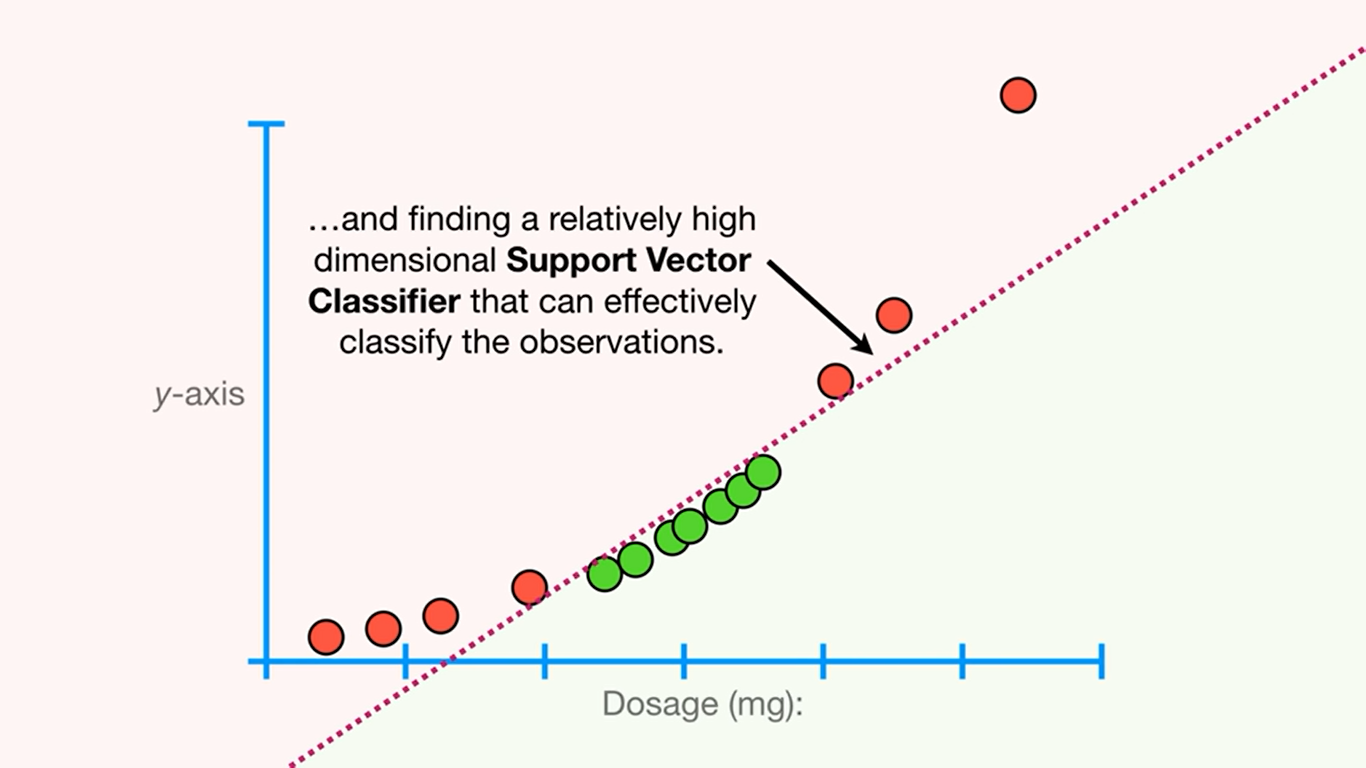

In [87]:
svm = svm.SVC()

In [88]:
svm.fit(X_train, y_train)

SVC()

In [89]:
y_pred2=svm.predict(X_test)

In [90]:
accuracy_score(y_test, y_pred2)

0.8661844484629295

In [91]:
precision_score(y_test, y_pred2)

0.8286713286713286

In [92]:
recall_score(y_test, y_pred2)

0.9045801526717557

In [93]:
f1_score(y_test, y_pred2)

0.864963503649635

### KNN Classifier

In [94]:
knn = KNeighborsClassifier()

In [95]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [96]:
y_pred3 = knn.predict(X_test)

In [97]:
accuracy_score(y_test, y_pred3)

0.8752260397830018

In [98]:
precision_score(y_test, y_pred3)

0.7987616099071208

In [99]:
recall_score(y_test, y_pred3)

0.9847328244274809

In [100]:
f1_score(y_test, y_pred3)

0.8820512820512819

### Decision Tree Classifier

In [101]:
dt = DecisionTreeClassifier()

In [102]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
y_pred4 = dt.predict(X_test)

In [104]:
accuracy_score(y_test, y_pred4)

0.8987341772151899

In [105]:
precision_score(y_test, y_pred4)

0.8786764705882353

In [106]:
recall_score(y_test, y_pred4)

0.9122137404580153

In [107]:
f1_score(y_test, y_pred4)

0.8951310861423221

### Random Forest Classifier

In [108]:
rf = RandomForestClassifier()

In [109]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [110]:
y_pred5 = rf.predict(X_test)

In [111]:
accuracy_score(y_test, y_pred5)

0.9204339963833634

In [112]:
precision_score(y_test, y_pred5)

0.8892857142857142

In [113]:
recall_score(y_test, y_pred5)

0.950381679389313

In [114]:
f1_score(y_test, y_pred5)

0.9188191881918819

### Gradient Boosting Classifier

* GBC is an algorithm that is based on trees where each tree is an improvement for the previous tree.
* Initially, the probability that a sample is positive is calculated as log(no. of +ve / no. of -ve).
* Then, the residual for each sample is calculated as follows: (observed probability - predicted probability). Note that it can be a negative value especially for the negative class.
* These residuals will be the leaves of the first tree. We can limit the number of leaves by adjusting the parameter max_leaf_nodes. By default, the number of leafs is unlimited
* We can also limit the number of trees by adjusting the parameter n_estimators
* For each leaf, we calculate an output value by using the following formula:
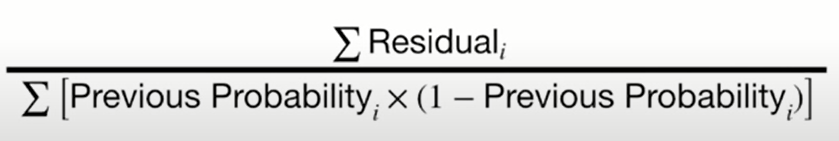
* Note: for now, the previous probabilities are the same for all the residuals, but this will change when we build the next tree.
* Now we are ready to update our predictions by combining the initial leaf with the new tree.
* The new tree is scaled by a learning rate to avoid overfitting.
* The log of odds for each sample is caculated as: initial probability + learning rate * output value for the leaf that this sample belongs to
* log of odds is converted to a probability as follows: exp(log of odds) / (1 + exp(log of odds))
* If the sample belongs to the positive class and the probability increases, then the algorithm works fine because it improves over the previous tree
* Some probabilities may be worse than before and this is one of the reasons several trees are built
* We calculate the residual by the same equation as before. However, this time the predicted probabilities are different from each other.
* We can build a new tree where these residuals are the leaves
* We calculate the output value for each leaf as before
* This process repeats until we get the maximum number of trees specified or the residuals get super small

In [115]:
gbc=GradientBoostingClassifier()

In [116]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [117]:
y_pred6 = gbc.predict(X_test)

In [118]:
accuracy_score(y_test, y_pred6)

0.8698010849909584

In [119]:
precision_score(y_test, y_pred6)

0.8442028985507246

In [120]:
recall_score(y_test, y_pred6)

0.8893129770992366

In [121]:
f1_score(y_test, y_pred6)

0.8661710037174722

# Comparing Results of Models

In [122]:
Final_Results = pd.DataFrame({'Models':['Logestic Regression', 'Support Vector Classifier', 'K-nearest Neighbor', 'Decision Tree', 'Random Forest', 'Gradient Boosting Classifier'],
                              'Accuracy':[accuracy_score(y_test, y_pred1)*100,
                                         accuracy_score(y_test, y_pred2)*100,
                                         accuracy_score(y_test, y_pred3)*100,
                                         accuracy_score(y_test, y_pred4)*100,
                                         accuracy_score(y_test, y_pred5)*100,
                                         accuracy_score(y_test, y_pred6)*100]
                             })

In [123]:
Final_Results

,Models,Accuracy
0,Logestic Regression,80.289331
1,Support Vector Classifier,86.618445
2,K-nearest Neighbor,87.522604
3,Decision Tree,89.873418
4,Random Forest,92.043400
5,Gradient Boosting Classifier,86.980108


D:\python 3.10.6\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

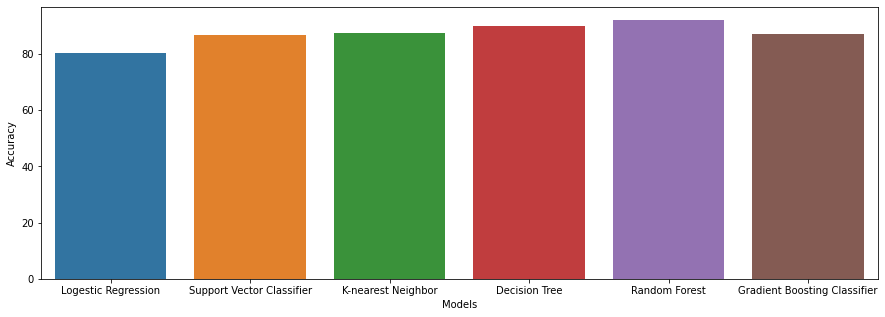

In [124]:
plt.figure(figsize=(15,5))
sns.barplot(Final_Results['Models'], Final_Results['Accuracy'])

# Saving the Model for Future Use

We noticed that random forest classifier is the best model in accuracy so we will save this model for future use

In [125]:
joblib.dump(rf, 'D:\FCI\Machine Learning\Wine Quality\Random Forest Wine Quality') #saving the model in the specified path

['D:\\FCI\\Machine Learning\\Wine Quality\\Random Forest Wine Quality']

In [126]:
model = joblib.load('D:\FCI\Machine Learning\Wine Quality\Random Forest Wine Quality') #loading the model from the saved path

In [127]:
new_data=pd.DataFrame({'fixed acidity':7.3, 'volatile acidity':0.65, 'citric acid':0.00, 'residual sugar':1.2, 'chlorides':0.065,
                      'free sulphur dioxide':15.0, 'total sulphur dioxide': 21.0, 'density':0.9946, 'pH':3.39, 'sulphates':0.47,
                      'alcohol':10.0}, index=[0])
# index provides the list of indices of rows

In [128]:
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,density,pH,sulphates,alcohol
0,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0


In [129]:
test=pca.transform(st.transform(new_data))

D:\python 3.10.6\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- free sulphur dioxide
- total sulphur dioxide
Feature names seen at fit time, yet now missing:
- free sulfur dioxide
- total sulfur dioxide

  warnings.warn(message, FutureWarning)


In [130]:
new_pred = model.predict(test)

In [131]:
new_pred

array([1], dtype=int64)

In [132]:
if new_pred[0]==1:
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Good Quality Wine
